# Сборный проект

- **Заказчик исследования**
Интернет-магазине «Стримчик»,2016
- **Данные**
Исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, из открытых источников
- **Цели исследования** 
Выявить закономерности, определяющие успешность игры, для дальнейшего выбора потенциально популярного продукта
- **Список сокращений**
 - Name — название игры
 - Platform — платформа
 = Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию..
 


## Открытие файла и изучение общей информации 

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt


In [2]:

data = pd.read_csv('/datasets/games.csv')
display(data.info())
display (data.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<b> Итог: </b>Загружены данные и просмотрена основная информация по датасету. В данных 16715 строки и 11 столбцов, в некоторых столбцах есть пропуски данных 

## Подготовка данных

### Переименование столбцов 

In [3]:
print(data.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [4]:
data=data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales',
'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'
})

In [5]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<b> Итог: </b>изменено название столбцов на нижний регистр

### Поиск дубликатов, изменения формата некоторых столбцов


In [6]:
print(data['user_score'].unique())
#data['year_of_release'] = pd.to_numeric(data['year_of_release'],downcast='integer',errors='coerce') 
display(data.head())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<b> Итог: </b>Изменяю типы столбцов: year_of_release, но результата нет, т.к. пропуски в столбеце. оставляю пока. 


In [7]:
#what_is_tbd = data.loc[data['user_score'] == 'tbd']
#print(what_is_tbd.head(30))
#print(what_is_tbd.info())
#print(what_is_tbd['rating'].unique())
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')
print(data['user_score'].unique())

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


Попытка разобраться, что такое tbd: сделала выборку методом .loc и посмотрела в ней данные. По данным в выборке закономерностей не нашла. Скорее всего сокращение: To Be Determined (будет определено). Тогда по смыслу можно перевести столбец в числовой формат и заменить tbd на NAN. Код по выборке закрыла #  <b> Итог: </b> 'user_score' переведен в числовой формат

In [8]:
print(data.duplicated().sum())

0


Проведена проверка на явные дубликаты 
<b> Выводы: </b>явных дубликатов нет 

In [9]:
print(data['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


смотрю список уникальных значений и проверяю на неявные дубликаты в столбце платформ <b> Выводы: </b> Неявных дубликатов в этом разделе не обнаружено

In [10]:
print(data['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


смотрю список уникальных значений и проверяю на неявные дубликаты в столбце жанров. <b> Выводы: </b> Неявных дубликатов в столбце жанров не обнаружено

In [11]:
print(data['name'].value_counts())
name_not_uni = data.loc[data['name'] == 'Need for Speed: Most Wanted']
print(name_not_uni.head())

Need for Speed: Most Wanted           12
LEGO Marvel Super Heroes               9
Ratatouille                            9
Madden NFL 07                          9
FIFA 14                                9
                                      ..
Yu-Gi-Oh! Reshef of Destruction        1
Shrek Swamp Kart Speedway              1
Sesame Street: Once Upon A Monster     1
Truck Racer                            1
The Settlers                           1
Name: name, Length: 11559, dtype: int64
                             name platform  year_of_release   genre  na_sales  \
253   Need for Speed: Most Wanted      PS2           2005.0  Racing      2.03   
523   Need for Speed: Most Wanted      PS3           2012.0  Racing      0.71   
1190  Need for Speed: Most Wanted     X360           2012.0  Racing      0.62   
1591  Need for Speed: Most Wanted     X360           2005.0  Racing      1.00   
1998  Need for Speed: Most Wanted       XB           2005.0  Racing      0.53   

      eu_sales  jp_sal

Рассмотрела список уникальных значений и повторы в столбце "name" <b> Выводы: </b> Это разные годы релиза и разные платформы, не дубликаты 

In [12]:
print(data['critic_score'].value_counts())
print(data['critic_score'].unique())

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


<b> Итог: </b> Рассмотрела данные в critic_score, в принципе, это целое число. Но на int заменить не получится, тк.пропуски


In [13]:
data['rating'] = data['rating'].fillna(value='unknown') 

<b> Итоги по изменения формате и удалению пропусков: </b> 

Проведен анализ пропусков, замена формата по мере необходимости, поиск явных и неявных дубликатов.

В целом пропуске в датасете могут быть по нескольким причинам: 
1. данных не было изначально никогда (особенности сбора данных за весь исторический период 
2. данных за 2016 еще не было на момент датасета в 2016 году 
3. не был предусмотрен сбор данных по какой-нибуль категории (например, в датасете рейтингов ESRB не все варианты присутсвуют - нет  «EC» («Early childhood») или «AO» («Adults Only 18+»)
4. данные потеряны по какой-либо технической причине (при сборе, хранении, копировании) 


- Изменен формат столбцов 'user_score': 'tbd' скорее всего означает 'To Be Determined (будет определено - прямое указание на то, что данных на момент получения датасета не было)' Вероятно, другие пропуски по этой же причине.'tbd' заменено на nan, 'user_score' переведен в числовой формат.
- Пробовала изменить формат 'year_of_release' на INT, но результата не было, т.к. пропуски в столбце. Отложила это, т.к. в дальшейшем в работе была в основном выборка из датасета с точным указанием года, где формат был изменен.
- Проверила на явные и неявные дубликаты в столбцах 'name', 'genre', не выявила таких
- Пропуски в столбце 'rating' заменила на 'unknown', т.к. выяснилось, что у ESRB нет универсального применения и в результате много пропущенных данных.



### Добавление столбца с итогами продаж по всем регионам

In [14]:
data['global_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  global_sales     16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB
None


## Исследовательский анализ данных

### Динамика выпуска и продаж игр по данным за весь период 

                 количество выпущенных игр
year_of_release                           
1980.0                                   9
1981.0                                  46
1982.0                                  36
1983.0                                  17
1984.0                                  14
1985.0                                  14
1986.0                                  21
1987.0                                  16
1988.0                                  15
1989.0                                  17
1990.0                                  16
1991.0                                  41
1992.0                                  43
1993.0                                  60
1994.0                                 121
1995.0                                 219
1996.0                                 263
1997.0                                 289
1998.0                                 379
1999.0                                 338
2000.0                                 350
2001.0     

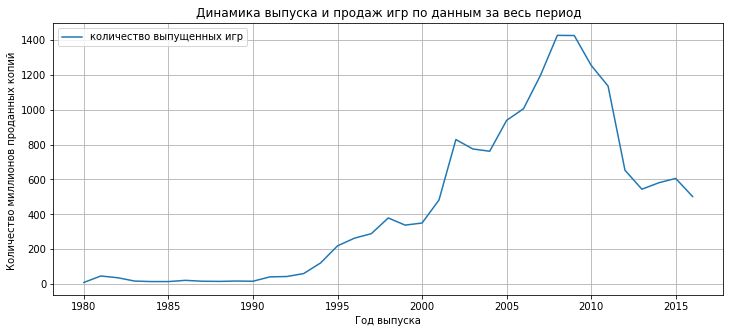

In [15]:

#data.groupby('year_of_release').['name'].count()

year_pivot = data.pivot_table(index='year_of_release', values='name', aggfunc=['count'])
year_pivot.columns = ['количество выпущенных игр'] 
print(year_pivot)
year_pivot.plot(grid=True, figsize=(12, 5))
plt.title('Динамика выпуска и продаж игр по данным за весь период')
plt.xlabel('Год выпуска')
plt.ylabel('Количество миллионов проданных копий ')
plt.show()

<b> Выводы: </b> Анализирую данные по годам, явные изменения динамики после 1993, но это слишком давний период. Пробую найти другой критерий для границы выборки по годам. И с 2009 примерно идет вниз - смарфоны вытесняют? видеокарты? (версия). Может быть взять период с 2013 года? 

### Анализ динамики продаж по платформам 

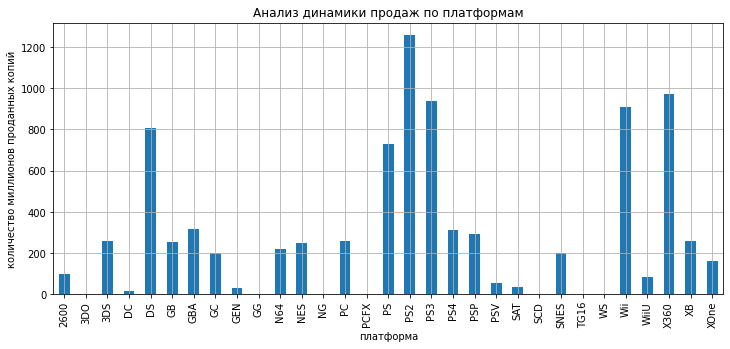

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: global_sales, dtype: float64
cумма по global_sales 8915.71
количество платформ в датасете 31
средняя цифра по платформе 287.60354838709674
          количество миллионов проданных копий
platform                                      
PS2                                    1255.77
X360                                    971.42
PS3                                     939.65
Wii                                     907.51
DS                                      806.12
PS                   

In [16]:
data.groupby('platform')['global_sales'].sum().plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Анализ динамики продаж по платформам')
plt.xlabel('платформа')
plt.ylabel('количество миллионов проданных копий')
plt.show()
print(data.groupby('platform')['global_sales'].sum())
#print ('количество платформ', len(data['platform'].unique())
print('cумма по global_sales', data['global_sales'].sum())
print('количество платформ в датасете', len(data['platform'].unique()))
print('средняя цифра по платформе', data['global_sales'].sum()/len(data['platform'].unique()))
sales_by_platform = (data.pivot_table(index = 'platform', values = 'global_sales', aggfunc = 'sum').
sort_values('global_sales', ascending = False))
sales_by_platform.columns = [ 'количество миллионов проданных копий'] 
print(sales_by_platform)


<b> Итоги: </b> По рассчитаному ранее: среднее количество продаж копий на платфоме 287+ миллионов копий. 
 
Сгруппируем данные по суммарным продажам на платформах и выделим 6 с наибольшими суммарными продажами : 
DS       806.12 
PS       730.86
PS2     1255.77
PS3      939.65
Wii      907.51
X360     971.42

Очевидно, что основной объем продаж делает несколько крупных платформ. При из анализе в дальнейшем возьмем на условную границу 500 млн копий 
<b> Выводы: </b> Предлагаю считать границой "наибольшего успеха" 500 млн копий на платформе за всю историю и более 50 млн в год - предлагаю как человеко-понятную категориаьную границу на основе визуального анализа данных 

#### Платформа 'DS'

                 количество продаж
year_of_release                   
1985.0                        0.02
2004.0                       17.27
2005.0                      130.14
2006.0                      119.81
2007.0                      146.94
2008.0                      145.31
2009.0                      119.54
2010.0                       85.02
2011.0                       26.18
2012.0                       11.01
2013.0                        1.54


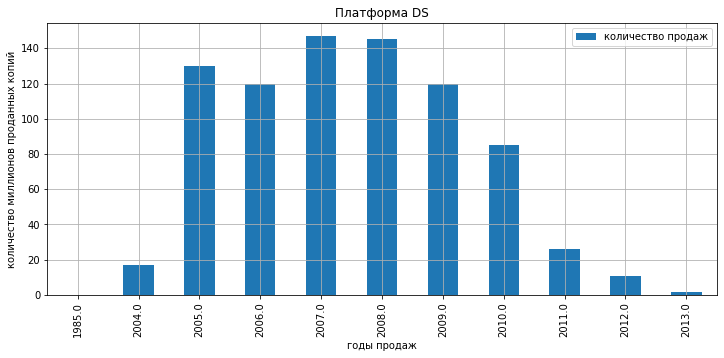

In [17]:
data_ds = data.loc[data['platform'] == 'DS']
data_ds_pivot = data_ds.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_ds_pivot.columns = ['количество продаж'] 
print(data_ds_pivot)
data_ds_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа DS')
plt.xlabel('годы продаж')
plt.ylabel('количество миллионов проданных копий')
plt.show()

<b> Выводы: </b> Платформа 'DS' существовала с 2004 по 2013 (судя по данным, в 85м какой-то артефакт???), успешно с 2005 по 2010 включительно, 6 лет 
<b> Примечание: </b>Артефакт привел в Википедию и дальше. Оказалось 'Свою историю компания Nintendo начала 23 сентября 1889 года, когда Фусахиро Ямаути ....начала выпускать японские игральные карты Hanafuda (цветок)'....потом много всего... и 'Nintendo Entertainment System (NES)
В 1985 представила в США и в 1986 году в Европе игровую приставку Nintendo Entertainment System, которая, по сути, была ребрендингом Famicom для иностранных рынков.'... 31 августа 2013 "поддержка прекращена", платформа во что-то эволюционировала 

#### Платформа 'PS'

                 количество продаж
year_of_release                   
1994.0                        6.03
1995.0                       35.96
1996.0                       94.70
1997.0                      136.17
1998.0                      169.49
1999.0                      144.53
2000.0                       96.37
2001.0                       35.59
2002.0                        6.67
2003.0                        2.07


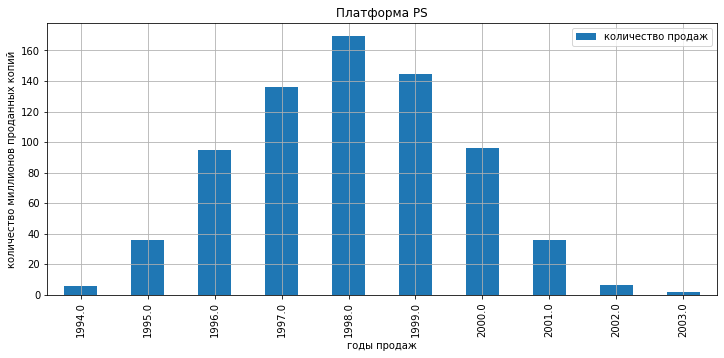

In [18]:
data_ps = data.loc[data['platform'] == 'PS']
data_ps_pivot = data_ps.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_ps_pivot.columns = ['количество продаж'] 
print(data_ps_pivot)
data_ps_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа PS')
plt.xlabel('годы продаж')
plt.ylabel('количество миллионов проданных копий')
plt.show()

<b> Выводы: </b> Платформа 'PS' существовала с 1994 по 2003, наиболее активно с 1996 по 2001, 5 лет. (PlayStation (c 1994 - подтвердила в Википедии. Потом она обновляется и будет с номерами.) 

#### Платформа 'PS2'

                 количество продаж
year_of_release                   
2000.0                       39.17
2001.0                      166.43
2002.0                      205.38
2003.0                      184.31
2004.0                      211.81
2005.0                      160.66
2006.0                      103.42
2007.0                       75.99
2008.0                       53.90
2009.0                       26.40
2010.0                        5.64
2011.0                        0.45


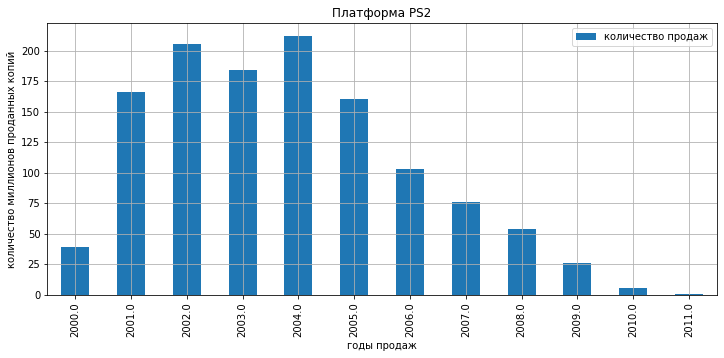

In [19]:
data_ps2 = data.loc[data['platform'] == 'PS2']
data_ps2_pivot = data_ps2.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_ps2_pivot.columns = ['количество продаж'] 
print(data_ps2_pivot)
data_ps2_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа PS2')
plt.xlabel('годы продаж')
plt.ylabel('количество миллионов проданных копий')
plt.show()

<b> Выводы: </b>Платформа 'PS2' существовала с 2000 по 2011, наиболее активно с 2001 по 2008, 8 лет. (по Википедии поддержка прекращена 4 января 2013, продажи вероятно ранее) 

#### Платформа 'PS3'

                 количество продаж
year_of_release                   
2006.0                       20.96
2007.0                       73.19
2008.0                      118.52
2009.0                      130.93
2010.0                      142.17
2011.0                      156.78
2012.0                      107.36
2013.0                      113.25
2014.0                       47.76
2015.0                       16.82
2016.0                        3.60


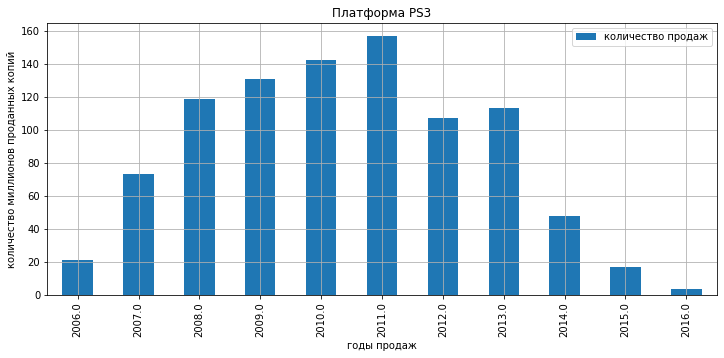

In [20]:
data_ps3 = data.loc[data['platform'] == 'PS3']
data_ps3_pivot = data_ps3.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_ps3_pivot.columns = ['количество продаж'] 
print(data_ps3_pivot)
data_ps3_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа PS3')
plt.xlabel('годы продаж')
plt.ylabel('количество миллионов проданных копий')
plt.show()

<b> Выводы: </b> Платформа 'PS3' существовала с 2006 по 2016 (может и дальше), наиболее активно с 2007 по 2013, 7 лет. <b> Спойлеры из Википедии: </b> нет, дальше она не существовала...Да я бы и так ее не рекомендовала :))), тк в 2015 и 2016 все сходит на ноль

#### Платформа 'Wii' 

                 количество продаж
year_of_release                   
2006.0                      137.15
2007.0                      152.77
2008.0                      171.32
2009.0                      206.97
2010.0                      127.95
2011.0                       59.65
2012.0                       21.71
2013.0                        8.59
2014.0                        3.75
2015.0                        1.14
2016.0                        0.18


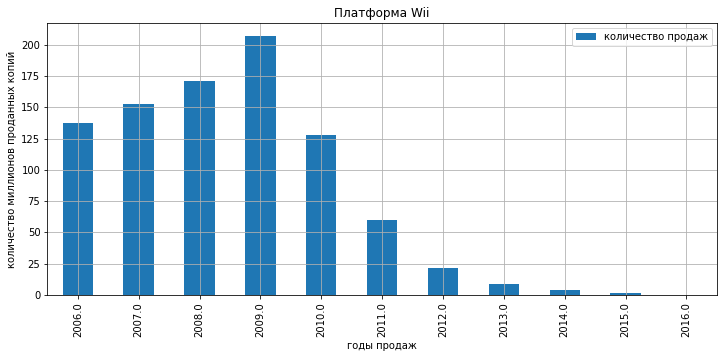

In [21]:
data_wii = data.loc[data['platform'] == 'Wii']
data_wii_pivot = data_wii.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_wii_pivot.columns = ['количество продаж'] 
print(data_wii_pivot)
data_wii_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа Wii')
plt.xlabel('годы продаж')
plt.ylabel('количество миллионов проданных копий')
plt.show()

<b> Выводы: </b>Платформа 'Wii' существовала с 2006 по 2016 (может и дальше), наиболее активно с 2006 по 2010, 5 лет. <b> Cпойлеры из Википедии: </b> посколько платформа очень плохо себя чувствует в 2013 - 2016 году, нужно узнать, что с ней стало в итоге... оказалось, что это была наследница Nintendo и тех поддержка прекращена 20 октября 2013, но каким-то чудом продажи наблюдаются до 2016... А кто был дальше? WiiU 

#### Платформа X360

                 количество продаж
year_of_release                   
2005.0                        8.25
2006.0                       51.62
2007.0                       95.41
2008.0                      135.26
2009.0                      120.29
2010.0                      170.03
2011.0                      143.84
2012.0                       99.74
2013.0                       88.58
2014.0                       34.74
2015.0                       11.96
2016.0                        1.52


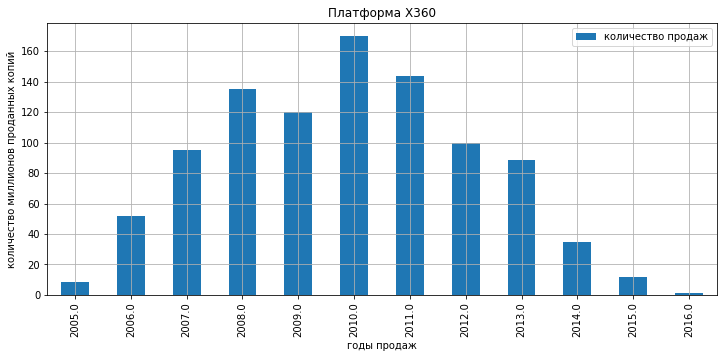

In [22]:
data_x360 = data.loc[data['platform'] == 'X360']
data_x360_pivot = data_x360.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_x360_pivot.columns = ['количество продаж'] 
print(data_x360_pivot)
data_x360_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа X360')
plt.xlabel('годы продаж')
plt.ylabel('количество миллионов проданных копий')
plt.show()

<b> Выводы: </b>Платформа 'X360' существовала с 2005 по 2016 (может и дальше), наиболее активно с 2007 по 2013, 6 лет.<b> Спойлеры от Википедии: </b>поддержка прекращена 20 апреля 2016 (снят с производства)

<b> Выводы по всем платфомам: </b> На основе выбранных категорий (считать границой "наибольшего успеха" 500 млн за всю историю и более 50 млн в год) период успешого существования платформ 5-8 лет. Это подводит к пониманию границ актуального периода. Точно не имеет смысла больше 10 лет, вероятно меньше. Анализируя общий график, видно что весь рынок упал в 2012 году и с тех пор (до 16 года) примерно одинаковый. Но когда был бурный рост (напр.2007) - росло очень быстро и резко вверх. В общем, у меня выбор из 2-х идей про актуальный период - брать 10 лет, это будет оптимистичный прогноз. Или брать данные с 2012 года (это будет осторожный прогноз). <b> Решение: </b>Выберу осторожный вариант - актуальный период с 2012.  

### Датасет на актуальный период (с 2012 года)

In [23]:
data_new = data.copy()
data_new = data_new.loc[data['year_of_release'] >= 2012]
data_new['year_of_release'] = pd.to_numeric(data_new['year_of_release'],downcast='integer',errors='coerce')
print(data_new.info())
print(data_new.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int16  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  global_sales     2886 non-null   float64
dtypes: float64(7), int16(1), object(4)
memory usage: 276.2+ KB
None
                          name platform  year_of_release         genre  \
16          Grand Theft Auto V      PS3             2013        Action   
23          Grand Theft Auto V

<b> Итоги: </b>Создан новый датасет с данными только с 2012 года. В датасете 2886 строк. Поскольку в столбце year_of_release больше нет пропусков, можно перевести его в int, чтобы красиво смотрелось на графиках.     

### Анализ актуальных данных по платформам 

#### Выявление платформ с высокой активностью продаж в актуальный период

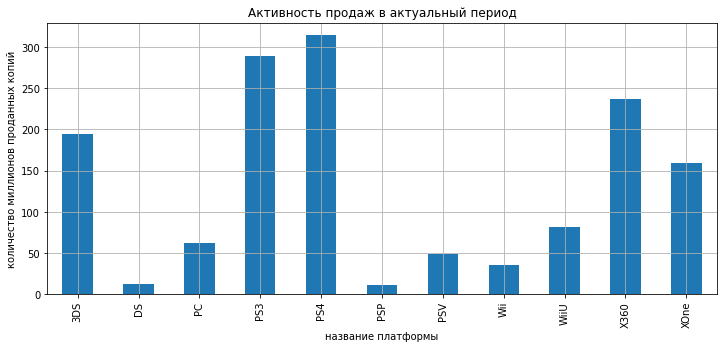

platform
3DS     194.61
DS       12.55
PC       62.65
PS3     288.79
PS4     314.14
PSP      11.19
PSV      49.18
Wii      35.37
WiiU     82.19
X360    236.54
XOne    159.32
Name: global_sales, dtype: float64
cумма по global_sales с 2012 1446.5300000000002
количество платформ в датасете с 2012 11
средняя цифра по платформе с 2012 131.5027272727273


In [24]:
data_new.groupby('platform')['global_sales'].sum().plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Активность продаж в актуальный период')
plt.xlabel('название платформы')
plt.ylabel('количество миллионов проданных копий')
plt.show()
print(data_new.groupby('platform')['global_sales'].sum())
print('cумма по global_sales с 2012', data_new['global_sales'].sum())
print('количество платформ в датасете с 2012', len(data_new['platform'].unique()))
print('средняя цифра по платформе с 2012', data_new['global_sales'].sum()/len(data_new['platform'].unique()))

<b> Выводы: </b> По результатам видно 5 платформ с высокой активностью продаж за период: 
   3DS     194.61 
   PS3     288.79
   PS4     314.14
   X360    236.54
   XOne    159.32

Рассмотрим сначала каждую платформу с высокой актуальной активностью по отдельности 


#### Платформа '3DS'

                 количество продаж
year_of_release                   
2012                         51.36
2013                         56.57
2014                         43.76
2015                         27.78
2016                         15.14


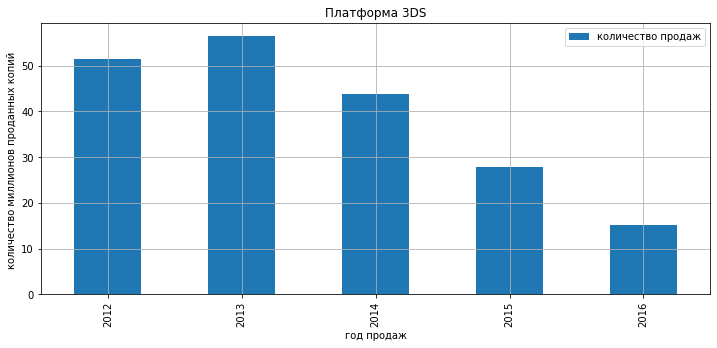

In [25]:
data_new_3ds = data_new.loc[data['platform'] == '3DS']
data_new_3ds_pivot = data_new_3ds.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_new_3ds_pivot.columns = ['количество продаж'] 
print(data_new_3ds_pivot)
data_new_3ds_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа 3DS')
plt.xlabel('год продаж')
plt.ylabel('количество миллионов проданных копий ')
plt.show()

<b> Выводы: </b>Активность продаж на платформе 3DS идет вниз.(тоже оказалась Nintendo, Nintendo 3DS) 

#### Платформа 'PS3'

                 количество продаж
year_of_release                   
2012                        107.36
2013                        113.25
2014                         47.76
2015                         16.82
2016                          3.60


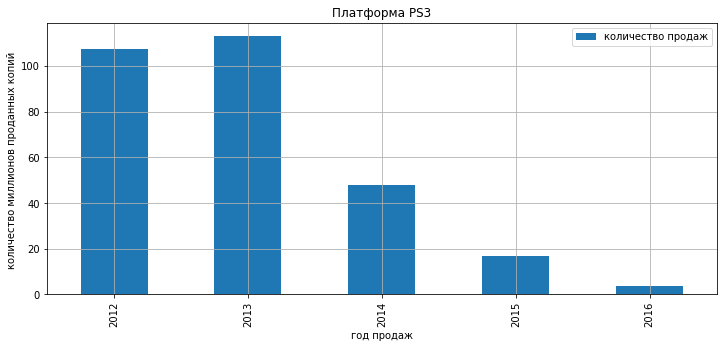

In [26]:
data_new_ps3 = data_new.loc[data['platform'] == 'PS3']
data_new_ps3_pivot = data_new_ps3.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_new_ps3_pivot.columns = ['количество продаж'] 
print(data_new_ps3_pivot)
data_new_ps3_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа PS3')
plt.xlabel('год продаж')
plt.ylabel('количество миллионов проданных копий ')
plt.show()

<b> Выводы: </b> Активность продаж на PS3 тоже идет вниз 

#### Платформа 'PS4'

                 количество продаж
year_of_release                   
2013                         25.99
2014                        100.00
2015                        118.90
2016                         69.25


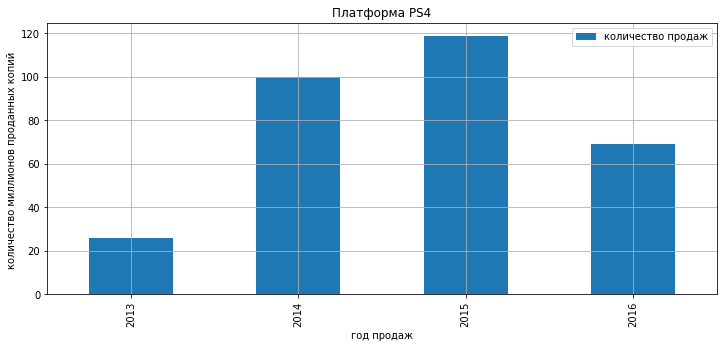

In [27]:
data_new_ps4 = data_new.loc[data['platform'] == 'PS4']
data_new_ps4_pivot = data_new_ps4.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_new_ps4_pivot.columns = ['количество продаж'] 
print(data_new_ps4_pivot)
data_new_ps4_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа PS4')
plt.xlabel('год продаж')
plt.ylabel('количество миллионов проданных копий ')
plt.show()

<b> Выводы: </b> платфома PS4 более новая, 2016 год меньше двух предудущих, но показатель продаж по сравнению с другими платформами высокий


#### Платформа 'X360'

                 количество продаж
year_of_release                   
2012                         99.74
2013                         88.58
2014                         34.74
2015                         11.96
2016                          1.52


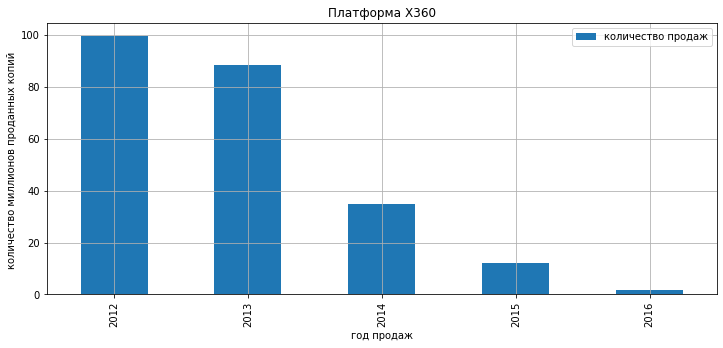

In [28]:
data_new_x360 = data_new.loc[data['platform'] == 'X360']
data_new_x360_pivot = data_new_x360.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_new_x360_pivot.columns = ['количество продаж'] 
print(data_new_x360_pivot)
data_new_x360_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа X360')
plt.xlabel('год продаж')
plt.ylabel('количество миллионов проданных копий ')
plt.show()

<b> Выводы: </b> На платформе X360 продажи падают 

#### Платформа 'XOne'

                 количество продаж
year_of_release                   
2013                         18.96
2014                         54.07
2015                         60.14
2016                         26.15


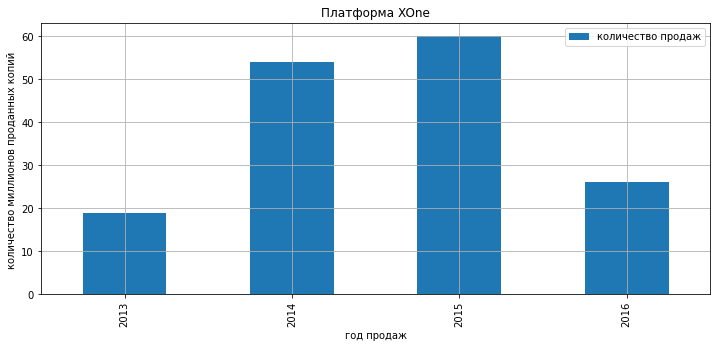

In [29]:
data_new_xone = data_new.loc[data['platform'] == 'XOne']
data_new_xone_pivot = data_new_xone.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_new_xone_pivot.columns = ['количество продаж'] 
print(data_new_xone_pivot)
data_new_xone_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа XOne')
plt.xlabel('год продаж')
plt.ylabel('количество миллионов проданных копий ')
plt.show()

<b> Выводы: </b> На 'XOne' продажи тоже падают.

<b> Выводы по платформам в целом: </b> Сравнительно со своим максимумому, тренд падения продаж относительно своего максимума 2016 году виден на всех крупных платформах.  Но есть условие, что "Данные за 2016 год могут быть неполными." 
Поэтому сравнительно в другими, можно назвать лидерами:
- "XOne"
- "PS4"

На других крупных платформах наблюдатеся существенный спад за несколько предыдущих лет: 
- "3DS"
- "PS3"
- "X360"

<div class="alert alert-info">Добавлены выводы к разделу и подписи к графикам </div>

#### Результаты по платформам на одном графике

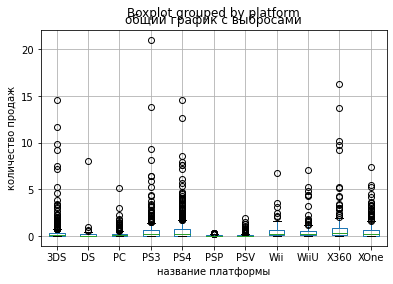

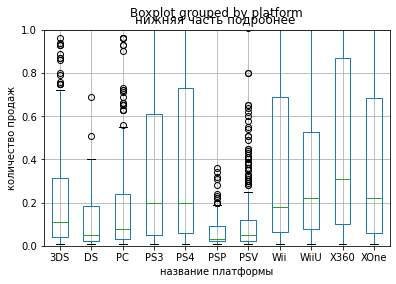

In [30]:

#data_new_pivot = data_new.pivot_table(index= ['platform','year_of_release'], values='global_sales', aggfunc=['sum'])
#data_new_pivot.columns = ['количество продаж'] 
#print(data_new_pivot)
# data_new_pivot.boxplot(by='platform')
data_new[['platform', 'global_sales']].boxplot(by='platform')
plt.title('общий график с выбросами')
plt.xlabel('название платформы')
plt.ylabel('количество продаж')
plt.show()
data_new[['platform', 'global_sales']].boxplot(by='platform')
plt.ylim(0,1)
plt.title('нижняя часть подробнее ')
plt.xlabel('название платформы')
plt.ylabel('количество продаж')
plt.show()


<b> Итоги: </b> Платформа PS4 по ситуации на конец 2016 года самая успешная, посмотрим ее подробнее 


#### Исследование закономерностей на платформе "PS4"

In [31]:
print(data_new_ps4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int16  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           392 non-null    object 
 11  global_sales     392 non-null    float64
dtypes: float64(7), int16(1), object(4)
memory usage: 37.5+ KB
None


In [32]:
data_new_ps4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,252.000000,257.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,72.091270,6.748249,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,12.485992,1.459481,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,66.000000,6.100000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.000000,7.000000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.000000,7.800000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


In [33]:
data_new_ps4.corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
global_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


<b> Итоги: </b>По матрице корреляций видна только прямая связь между global_sales и other_sales,eu_sales,na_sales (jp_sales - почти нет). Но это не открытие, тк. столбец global_sales составлен и 4 перечисленных, и их взаимосвязь техническая. Также есть связь между na_sales и eu_sales и other_sales (например. через моду на продукты), а jp_sales как-то само по себе, вероятно, на этом рынке нужна локализация, все остальное - преимущественно английский. А еще в количественном значении Япония - это очень маленький рынок. Эта информация вряд ли характеризует платформу, скорее ранок игр в целом.   

<b> Дополнено: </b> По Шкале Чеддока наблюдается "умеренная" корреляция между глобальными продажами и оценками критиков (0,4), "заметная" корреляция между оценками пользователей и оценками критиков (0,56). При этом не очевидна причинно-следственная связь, что и в какой последовательности из этих параметров первично, а что - производный результат. Корреляции между оценками пользователей и продажами не наблюдается. 

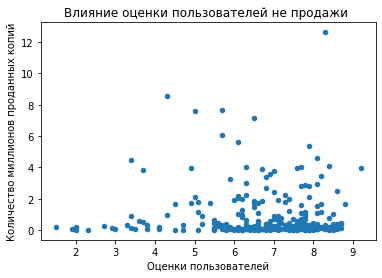

In [34]:
data_new_ps4.plot(x='user_score', y='global_sales', kind='scatter')
plt.title('Влияние оценки пользователей не продажи ')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество миллионов проданных копий')
plt.show()

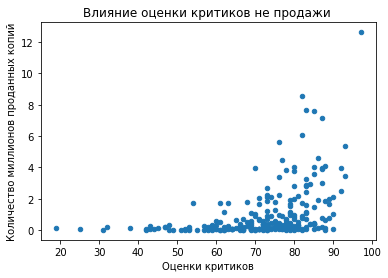

In [35]:
data_new_ps4.plot(x='critic_score', y='global_sales', kind='scatter')
plt.title('Влияние оценки критиков не продажи ')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество миллионов проданных копий')
plt.show()

<b> Выводы: </b>По диаграммам - оценки пользователей никак не влияют, оценки критиков - слабенько положительно (это была рекламная активность скорее всего). 

#### Исследование закономерностей на платформе "XOne"

На втором месте по продажам в 2016 - XOne. Посмотрим аналогично ее. 

In [36]:
print(data_new_xone.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    int16  
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           247 non-null    object 
 11  global_sales     247 non-null    float64
dtypes: float64(7), int16(1), object(4)
memory usage: 23.6+ KB
None


In [37]:
data_new_xone.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429,0.645020
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,1.380941,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,5.800000,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.800000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.500000,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,7.390000


In [38]:
data_new_xone.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
global_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


<b> Выводы: </b>По Шкале Чеддока наблюдается "умеренная" корреляция между глобальными продажами и оценками критиков (0,42), "умеренная" корреляция между оценками пользователей и оценками критиков (0,47). При этом не очевидна причинно-следственная связь, что и в какой последовательности из этих параметров первично, а что - производный результат. Корреляции между оценками пользователей и продажами не наблюдается.

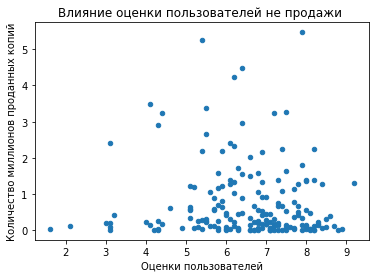

In [39]:
data_new_xone.plot(x='user_score', y='global_sales', kind='scatter')
plt.title('Влияние оценки пользователей не продажи ')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество миллионов проданных копий')
plt.show()

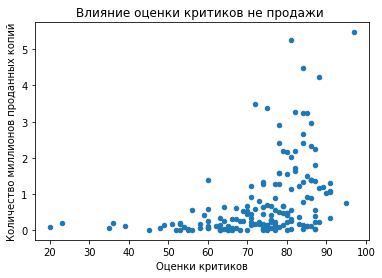

In [40]:
data_new_xone.plot(x='critic_score', y='global_sales', kind='scatter')
plt.title('Влияние оценки критиков не продажи ')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество миллионов проданных копий')
plt.show()

<b> Выводы: </b>Аналогично и на платформе XOne. По диаграммам - оценки пользователей никак не влияют, оценки критиков - слабенько положительно (рекламная активность скорее всего). 

#### Исследование закономерностей на платформе PC

Платформа PC выбрана для рассмотрения закономерностей, тк.далее в заданиях фигурирует при проверке гипотез, интересно получить о ней больше информации (аппаратная часть - персональный компьютер, т.е по существу не специальное игровое устройство)


                 количество продаж
year_of_release                   
2012                         23.22
2013                         12.38
2014                         13.28
2015                          8.52
2016                          5.25


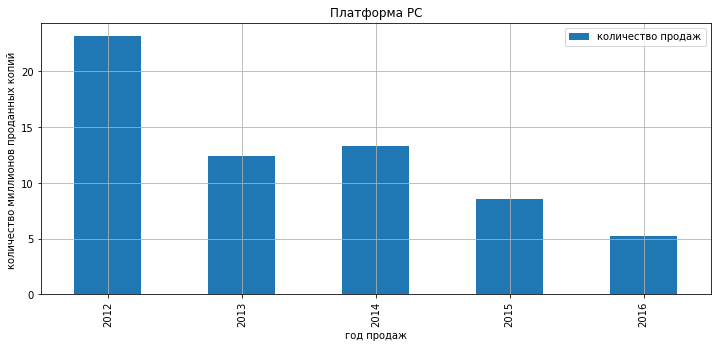

In [41]:
data_new_pc = data_new.loc[data['platform'] == 'PC']
data_new_pc_pivot = data_new_pc.pivot_table(index='year_of_release', values='global_sales', aggfunc=['sum'])
data_new_pc_pivot.columns = ['количество продаж'] 
print(data_new_pc_pivot)
data_new_pc_pivot.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформа PC')
plt.xlabel('год продаж')
plt.ylabel('количество миллионов проданных копий ')
plt.show()

In [42]:
data_new_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 192 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             250 non-null    object 
 1   platform         250 non-null    object 
 2   year_of_release  250 non-null    int16  
 3   genre            250 non-null    object 
 4   na_sales         250 non-null    float64
 5   eu_sales         250 non-null    float64
 6   jp_sales         250 non-null    float64
 7   other_sales      250 non-null    float64
 8   critic_score     198 non-null    float64
 9   user_score       206 non-null    float64
 10  rating           250 non-null    object 
 11  global_sales     250 non-null    float64
dtypes: float64(7), int16(1), object(4)
memory usage: 23.9+ KB


In [43]:
data_new_pc.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
count,250.000000,250.000000,250.000000,250.0,250.000000,198.000000,206.000000,250.00000
mean,2013.992000,0.076480,0.151040,0.0,0.023080,75.838384,6.428641,0.25060
std,1.483489,0.209996,0.255119,0.0,0.052348,10.389087,1.664465,0.49464
min,2012.000000,0.000000,0.000000,0.0,0.000000,33.000000,1.400000,0.01000
25%,2013.000000,0.000000,0.020000,0.0,0.000000,71.000000,5.500000,0.03000
50%,2014.000000,0.000000,0.060000,0.0,0.010000,77.500000,6.800000,0.08000
75%,2015.000000,0.080000,0.150000,0.0,0.020000,83.000000,7.700000,0.24000
max,2016.000000,2.440000,2.160000,0.0,0.540000,96.000000,9.300000,5.14000


In [44]:
data_new_pc.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
year_of_release,1.000000,-0.189081,-0.204354,NaN,-0.277910,0.006431,-0.113065,-0.215083
na_sales,-0.189081,1.000000,0.821310,NaN,0.921381,0.217961,-0.115004,0.945657
eu_sales,-0.204354,0.821310,1.000000,NaN,0.916742,0.236627,-0.120834,0.961466
jp_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_sales,-0.277910,0.921381,0.916742,NaN,1.000000,0.227282,-0.107965,0.969820
critic_score,0.006431,0.217961,0.236627,NaN,0.227282,1.000000,0.432587,0.237243
user_score,-0.113065,-0.115004,-0.120834,NaN,-0.107965,0.432587,1.000000,-0.121867
global_sales,-0.215083,0.945657,0.961466,NaN,0.969820,0.237243,-0.121867,1.000000


<b> Примечание: </b> актуальных данных по этой платформе нет по региону Япония 

Выводы: По Шкале Чеддока наблюдается "слабая" корреляция между глобальными продажами и оценками критиков (0,24), "умеренная" корреляция между оценками пользователей и оценками критиков (0,43). При этом не очевидна причинно-следственная связь, что и в какой последовательности из этих параметров первично, а что - производный результат. Корреляции между оценками пользователей и продажами не наблюдается.

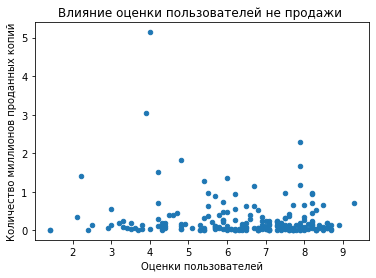

In [45]:
data_new_pc.plot(x='user_score', y='global_sales', kind='scatter')
plt.title('Влияние оценки пользователей не продажи ')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество миллионов проданных копий')
plt.show()

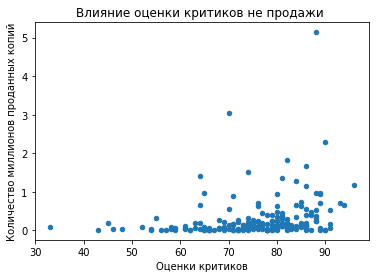

In [46]:
data_new_pc.plot(x='critic_score', y='global_sales', kind='scatter')
plt.title('Влияние оценки критиков не продажи ')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество миллионов проданных копий')
plt.show()

<b> Выводы: </b> Влияние оценок критиков на продажи, наблюдаемое по графику, очень слабое. Влияния оценок пользователей не наблюдается. 

### Исследование закономерностей по жанрам 

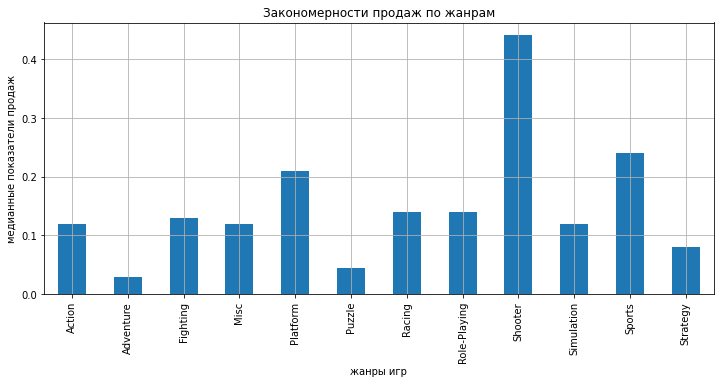

genre
Action          0.120
Adventure       0.030
Fighting        0.130
Misc            0.120
Platform        0.210
Puzzle          0.045
Racing          0.140
Role-Playing    0.140
Shooter         0.440
Simulation      0.120
Sports          0.240
Strategy        0.080
Name: global_sales, dtype: float64
              медианные показатели продаж по миру
genre                                            
Shooter                                     0.440
Sports                                      0.240
Platform                                    0.210
Role-Playing                                0.140
Racing                                      0.140
Fighting                                    0.130
Action                                      0.120
Misc                                        0.120
Simulation                                  0.120
Strategy                                    0.080
Puzzle                                      0.045
Adventure                                   0

In [47]:
#data_new.groupby('genre')['global_sales'].sum().plot(kind='bar', grid=True, figsize=(12, 5))
#print(data_new.groupby('genre')['global_sales'].sum())
data_new.groupby('genre')['global_sales'].median().plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Закономерности продаж по жанрам')
plt.xlabel('жанры игр')
plt.ylabel('медианные показатели продаж')
plt.show()
print(data_new.groupby('genre')['global_sales'].median())
sales_by_genre = (data_new.pivot_table(index = 'genre', values = 'global_sales', aggfunc = 'median').
sort_values('global_sales', ascending = False))
sales_by_genre.columns = [ 'медианные показатели продаж по миру'] 
print(sales_by_genre)
      

<b> Выводы: </b> 
выдающиеся результаты продаж у жанров: 
- Shooter                                     0.440
- Sports                                      0.240
- Platform                                    0.210

Наименее покупаемые жанры: 
- Strategy                                    0.080
- Puzzle                                      0.045
- Adventure                                   0.030


## Портреты пользователей из разных регионов 

<b> Примечание: </b> расшифровка сокращений в рейтингах ESRB
«E» («Everyone») — «Для всех»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»
«M» («Mature») — «Для взрослых»

### Северная Америка (NA)

               median
             na_sales
genre                
Action           0.02
Adventure        0.00
Fighting         0.05
Misc             0.01
Platform         0.09
Puzzle           0.00
Racing           0.04
Role-Playing     0.02
Shooter          0.20
Simulation       0.00
Sports           0.08
Strategy         0.00


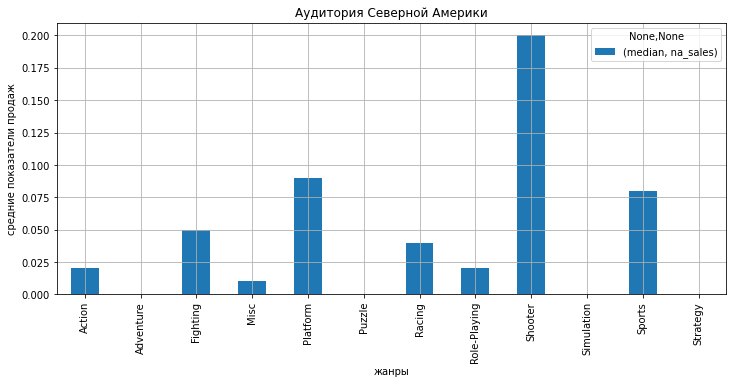

           median
         na_sales
platform         
3DS         0.000
DS          0.000
PC          0.000
PS3         0.050
PS4         0.060
PSP         0.000
PSV         0.000
Wii         0.045
WiiU        0.110
X360        0.170
XOne        0.120


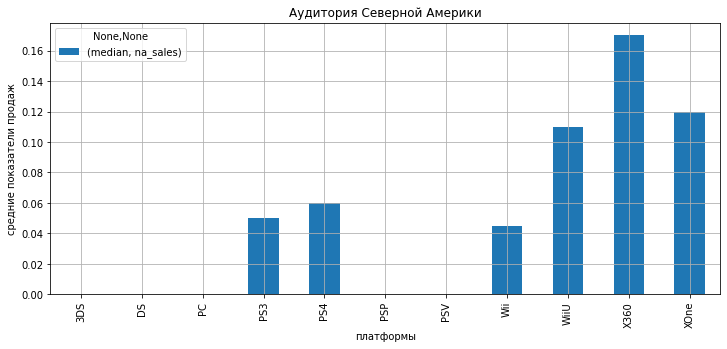

          median
        na_sales
rating          
E          0.070
E10+       0.130
M          0.155
T          0.050
unknown    0.000


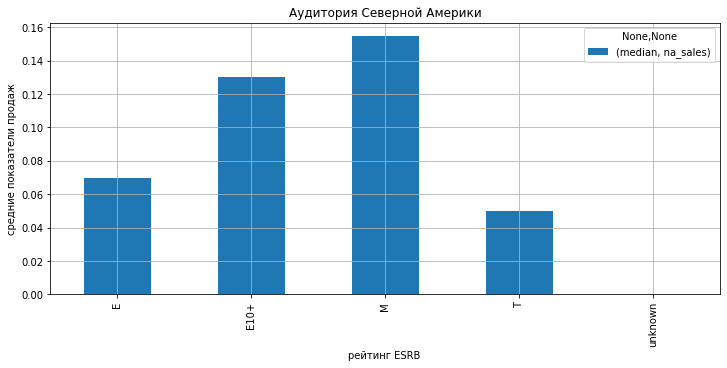

In [48]:
data_new_na_genre = data_new.pivot_table(index= ['genre'], values='na_sales', aggfunc=['median'])
print(data_new_na_genre)
data_new_na_genre.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Аудитория Северной Америки')
plt.xlabel('жанры')
plt.ylabel('средние показатели продаж')
plt.show()
data_new_na_platform = data_new.pivot_table(index= ['platform'], values='na_sales', aggfunc=['median'])
print(data_new_na_platform)
data_new_na_platform.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Аудитория Северной Америки')
plt.xlabel('платформы')
plt.ylabel('средние показатели продаж')
plt.show()
data_new_na_rating = data_new.pivot_table(index= ['rating'], values='na_sales', aggfunc=['median'])
print(data_new_na_rating)
data_new_na_rating.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Аудитория Северной Америки')
plt.xlabel('рейтинг ESRB ')
plt.ylabel('средние показатели продаж')
plt.show()

<b> Выводы: </b>По общей оценке, у североамериканских пользователей те же предпочтения по жанрам и платформам, что и у глобальной аудитории. По рейтингам самые ESRB продаваемые «M» («Mature») — «Для взрослых», на втором месте E10+, в категории 'unknown' практически пусто - очевидно без этого рейтинга на рынке СА не обойтись 

### Европа (EU)

               median
             eu_sales
genre                
Action          0.020
Adventure       0.000
Fighting        0.020
Misc            0.015
Platform        0.080
Puzzle          0.010
Racing          0.090
Role-Playing    0.010
Shooter         0.170
Simulation      0.030
Sports          0.050
Strategy        0.010


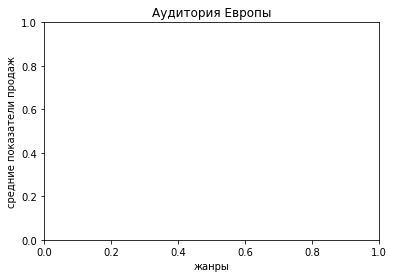

           median
         eu_sales
platform         
3DS          0.00
DS           0.02
PC           0.06
PS3          0.03
PS4          0.08
PSP          0.00
PSV          0.00
Wii          0.04
WiiU         0.07
X360         0.10
XOne         0.07


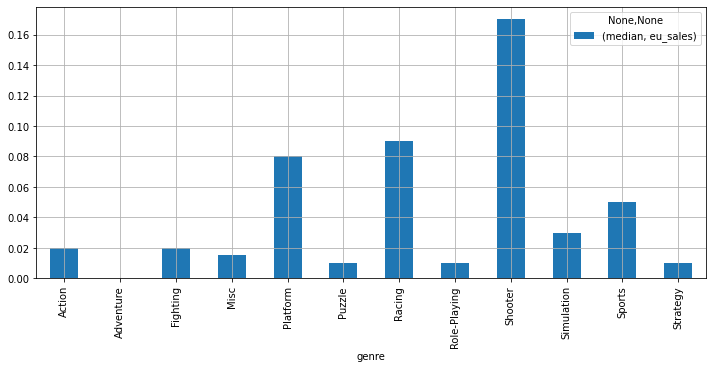

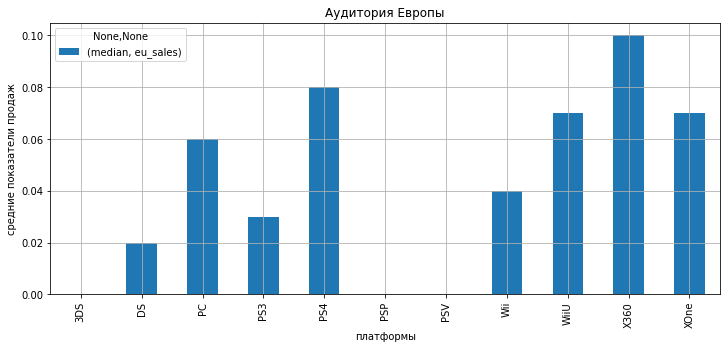

          median
        eu_sales
rating          
E           0.06
E10+        0.11
M           0.13
T           0.04
unknown     0.00


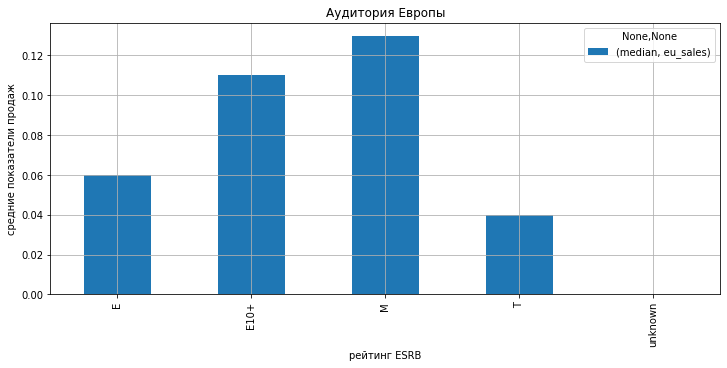

In [49]:
data_new_eu_genre = data_new.pivot_table(index= ['genre'], values='eu_sales', aggfunc=['median'])
print(data_new_eu_genre)
plt.title('Аудитория Европы')
plt.xlabel('жанры')
plt.ylabel('средние показатели продаж')
plt.show()
data_new_eu_genre.plot(kind='bar', grid=True, figsize=(12, 5))
data_new_eu_platform = data_new.pivot_table(index= ['platform'], values='eu_sales', aggfunc=['median'])
print(data_new_eu_platform)
data_new_eu_platform.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Аудитория Европы')
plt.xlabel('платформы')
plt.ylabel('средние показатели продаж')
plt.show()
data_new_eu_rating = data_new.pivot_table(index= ['rating'], values='eu_sales', aggfunc=['median'])
print(data_new_eu_rating)
data_new_eu_rating.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Аудитория Европы')
plt.xlabel('рейтинг ESRB')
plt.ylabel('средние показатели продаж')
plt.show()

<b> Выводы: </b> В Европе предпочтения аудитории во многом похожи на Северную Америку и общемировые. Из топа жанров на второе место добавляется 'Racing'. По рейтингам самые ESRB продаваемые «M» («Mature») — «Для взрослых», на втором месте E10+, 'unknown' в р-не нуля, аналогичная картина как в СА.  

### Япония (JP)

               median
             jp_sales
genre                
Action           0.01
Adventure        0.01
Fighting         0.03
Misc             0.02
Platform         0.00
Puzzle           0.00
Racing           0.00
Role-Playing     0.06
Shooter          0.00
Simulation       0.00
Sports           0.00
Strategy         0.00


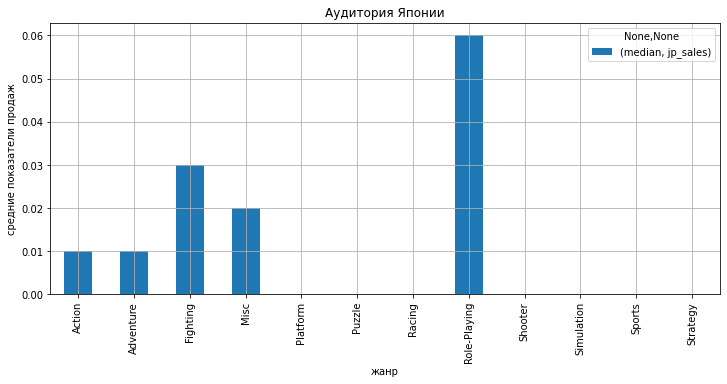

           median
         jp_sales
platform         
3DS          0.06
DS           0.00
PC           0.00
PS3          0.03
PS4          0.01
PSP          0.03
PSV          0.03
Wii          0.00
WiiU         0.00
X360         0.00
XOne         0.00


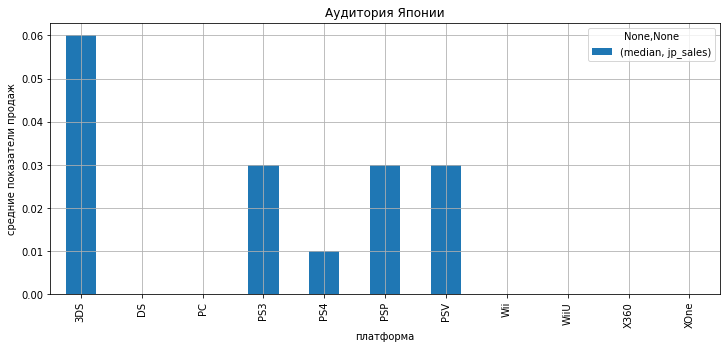

          median
        jp_sales
rating          
E           0.00
E10+        0.00
M           0.00
T           0.01
unknown     0.03


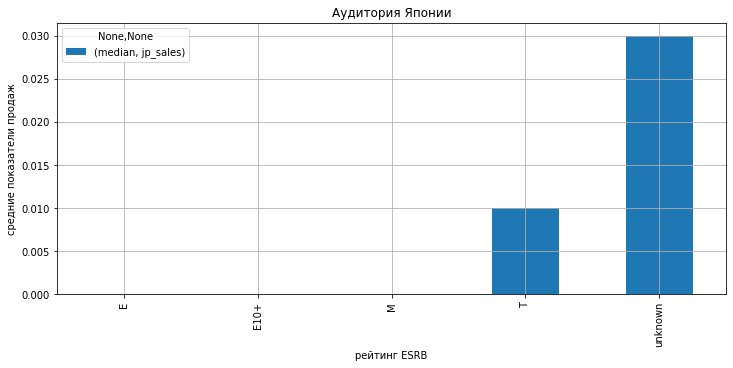

In [50]:
data_new_jp_genre = data_new.pivot_table(index= ['genre'], values='jp_sales', aggfunc=['median'])
print(data_new_jp_genre)
data_new_jp_genre.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Аудитория Японии')
plt.xlabel('жанр')
plt.ylabel('средние показатели продаж')
plt.show()
data_new_jp_platform = data_new.pivot_table(index= ['platform'], values='jp_sales', aggfunc=['median'])
print(data_new_jp_platform)
data_new_jp_platform.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Аудитория Японии')
plt.xlabel('платформа')
plt.ylabel('средние показатели продаж')
plt.show()
data_new_jp_rating = data_new.pivot_table(index= ['rating'], values='jp_sales', aggfunc=['median'])
print(data_new_jp_rating)
data_new_jp_rating.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Аудитория Японии')
plt.xlabel('рейтинг ESRB')
plt.ylabel('средние показатели продаж')
plt.show()

<b> Выводы: </b>А вот в Японии предпочтения публики отличаются. Что можно было предвидеть еще на матрице корреляций. Но добавились детали - на первом месте по жанрам Role-Playing (обгоняет общемировой Shooter). По платформам тоже другой лидер 3DS. Обратилась к википедии для понимания особенностей жанра. Тема оказалась обширной, но обнаружено, что выделяют 'ролевые игры западной школы и ролевые игры японской школы (jRPG)'. Прихожу к выводу, что это не артефакт сравнительно небольшой выборки по Японии, а некоторое культурное явление. Есть отличия от глобальной аудитории и в части влияния рейтинга: самые продаваемые  («unknown») — вероятно там своя система рейтигов.

<div class="alert alert-info">Разобралась в вопросе про систему ESRB. Поняла, что как минимум в Европе и в Японии вместо нее могут применяться локальные аналоги.  В начале исследования заполнила пропуски в этом стобце на 'unknown'</div>

## Проверка гипотез 

Гипотеза о равенстве средних двух генеральных совокупностей
В задании вопрос - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
Нулевая гипотеза: средние равны, различия отсутствуют  
Альтернативная гипозеза: средние не равны 

In [51]:


score_xbox=data_new.loc[data_new.platform=='XOne', 'user_score']
score_pc=data_new.loc[data_new.platform == "PC", 'user_score']

alpha = 0.05 
results=st.ttest_ind(score_xbox, score_pc, equal_var=False, nan_policy='omit')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC не одинаковые")
else:
    print("Не получилось отвергнуть нулевую гипотезу, не опровергнута гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые")

p-значение: 0.5489537965134987
Не получилось отвергнуть нулевую гипотезу, не опровергнута гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые


<b> Выводы: </b> не опровергнута гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые 

Гипотеза о равенстве средних двух генеральных совокупностей
В задании вопрос - "Средние пользовательские рейтинги жанров Action и Sports разные"
Нулевая гипотеза: средние равны, различия отсутствуют  
Альтернативня гипозеза: средние не равны 

In [52]:
score_action=data_new.loc[data_new.genre=='Action', 'user_score']
score_sports=data_new.loc[data_new.genre == "Sports", 'user_score']

alpha = 0.05 
results=st.ttest_ind(score_action, score_sports, equal_var=False, nan_policy='omit')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, вывод: средние пользовательские рейтинги жанров Action и Sports разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу об остутствии различий средних пользовательские рейтинги жанров Action и Sports")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу, вывод: средние пользовательские рейтинги жанров Action и Sports разные


<b> Выводы: </b> Средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

1. <b> Рассмотрены исторические даннные по платформам, </b> выявлено что период успешного существования платформ 5-8 лет

2. <b> В качестве периода времени выбранного для анализа актуального рынка </b> взят период с 2012 по 2016 года включительно

3. <b> Предпочтения глобальной аудитории </b> по датасету с 2012 по 2016 по платформам - обнаружено 5 платформ с высокой активностью продаж за период: 
 3DS (194.61), 
 PS3 (288.79), 
 PS4 (314.14), 
 X360 (236.54), 
 XOne (159.32). 
  По жанрам: 

**Выдающиеся результаты продаж у жанров:**
-  Shooter 
-  Sports 
- Platform 

**Наименее покупаемые жанры:**
- Strategy 
- Puzzle 
- Adventure 

4. <b> Влияние оценки пользователей и критиков на продажи : </b> не обнаруживается влияние оценок пользователей, оценки критиков влияют слабо-положительно. Предполагаю что общий фактор - рекламная компания, в результате оценки критиков и продажи растут. Сильной взаимосвязи нет. 

5. <b> Предпочтения пользователей из разных регионов : </b> по жанрам, платформам и влиянию рейтинга ESRB: существенных отличий у североамериканской и европейской аудитории от глобальной аудитории не выялено. Я вот у аудитории Японии наблюдаются отличия и по жанрам, и по платформам, и по рейтингам ESRB . В целом, рейтинг ESRB не показателен для анализа аудитории в Японии.
6. <b> Крупные платформы, активные на момент 2016 года : </b> на всех крупных платформах в 2016 году наблюдается относительный спад (но это может быть влияние неполных данных за 2016 год). 
  
  Поэтому сравнительно в другими, можно назвать лидерами:
  - "XOne"
  - "PS4"
  
  На других крупных платформах наблюдатеся существенный спад за несколько предыдущих лет:
  - "3DS"
  - "PS3"
  - "X360"
7. <b> Проверка гипотезы 1  : </b> не опровергнута гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
8. <b> Проверка гипотезы 2  : </b> средние пользовательские рейтинги жанров Action и Sports разные